# Пропуски

Cписок значений, которые по умолчанию считаются как пропуски: '', '#N/A', '#N/A N/A', '#NA', '-1.#IND', '-1.#QNAN', '-NaN', '-nan', '1.#IND', '1.#QNAN', 'N/A', 'NA', 'NULL', 'NaN', 'n/a', 'nan', 'null'.  

In [2]:
import pandas as pd

In [80]:
logs = pd.read_csv('log.csv', encoding='utf-8',header=None)
users = pd.read_csv('users.csv', encoding='koi8_r', sep='\t')

In [81]:
logs.columns = ['user_id','time','bet','win']
def corr_names(user_id):
    if 'error' in user_id:
        out_str=""
    else:
        index_id=user_id.find('user')
        out_str=user_id[index_id::]
    return out_str
logs.user_id=logs.user_id.apply(corr_names) 

In [82]:
users.columns = ['user_id', 'email', 'geo']

In [83]:
#library to visualize nan values
import missingno as msno

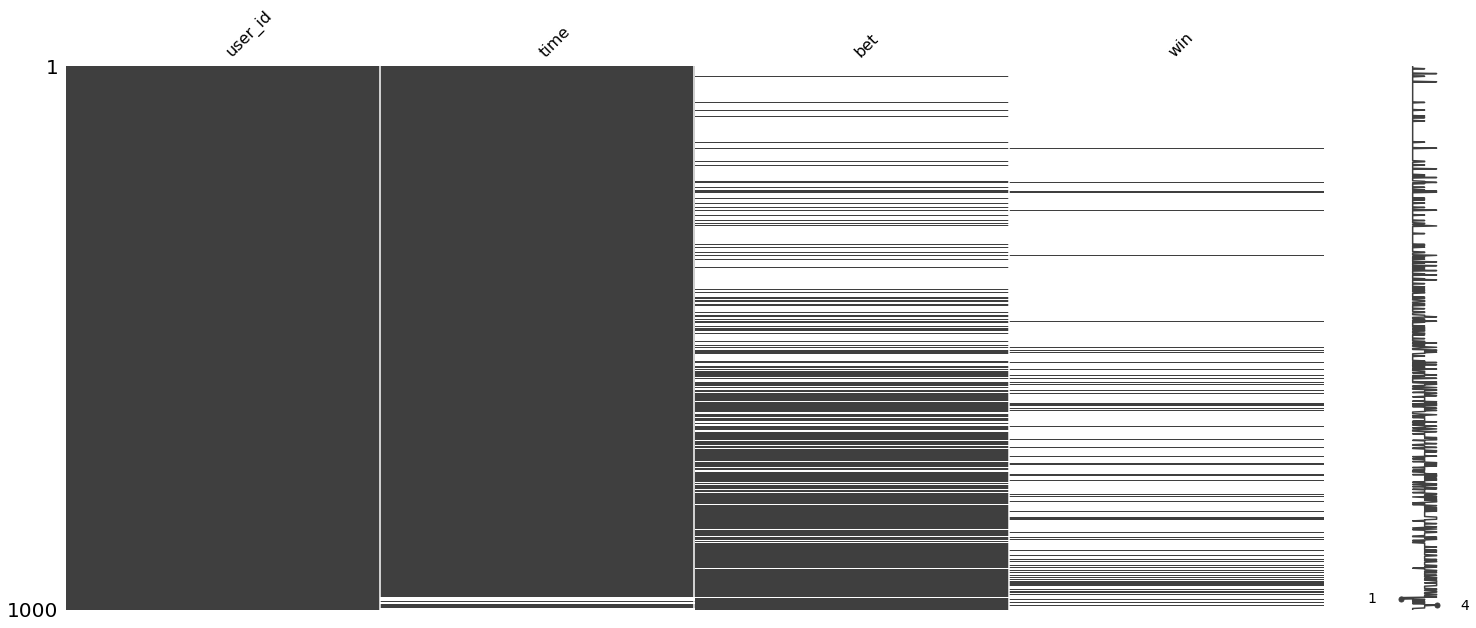

In [84]:
msno.matrix(logs)

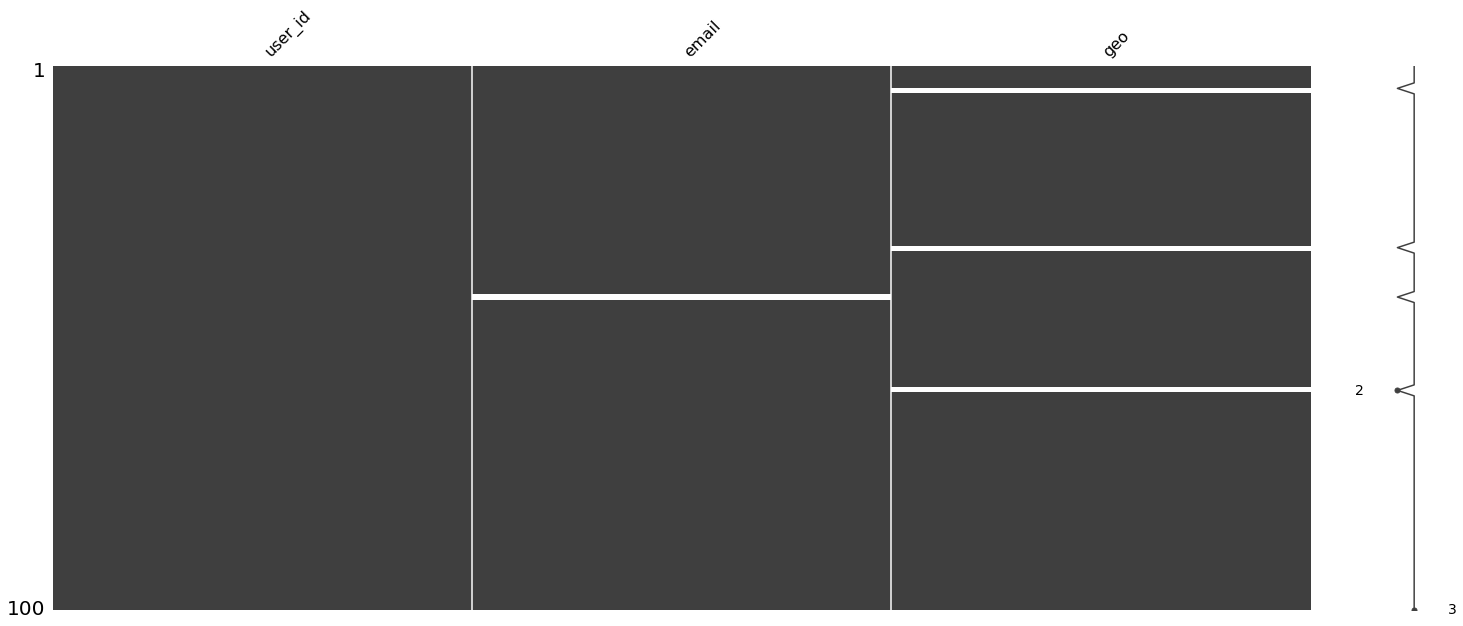

In [85]:
msno.matrix(users)

In [86]:
logs_nan_values_count = 0
for i in logs.time.isna():
    if i:
        logs_nan_values_count += 1

In [87]:
logs_nan_values_count

15

Параметр axis в методе dropna() говорит методу, по какой оси удалять значения.  

        Если нужно удалить строки, в которых встречается пропуск (NaN), следует указать axis=0.  Зачем это делать? Например, у нас из 1000 примеров данных про пользователей пропуски есть в пяти. Разумно их удалить, так как их количество пренебрежимо мало.
        Если нужно удалить столбцы, в которых встречается пропуск (NaN), нужно указывать axis=1. Зачем? Иногда в одном конкретном столбце пропусков настолько много, что с ними просто не хочется возиться - смысла в них все равно почти нет. 

Еще один интересный параметр - subset. Что он делает? Если передать в него список значений по одной оси (например, названия столбцов) и задать при этом в параметре axis другую ось (в нашем случае 0), то мы удалим те строки, для которых в данных столбцах находится пропуск. То же самое работает и наоборот: нужно поменять axis на 1 и вместо названий столбцов передавать индексы строк.

In [88]:
logs_dropted_nan = logs.copy()
users_dropted_nan = users.copy()

In [89]:
logs_dropted_nan.dropna(axis=0, inplace=True)

In [90]:
users_dropted_nan.dropna(axis=0, inplace=True)

In [91]:
len(logs_dropted_nan)

133

In [92]:
len(users_dropted_nan)

96

In [93]:
logs_dropted_nan.columns

Index(['user_id', 'time', 'bet', 'win'], dtype='object')

# Дубли

В pandas есть метод для удаления дублей (дубликатов) - drop_duplicates(). Он просто удаляет повторяющиеся строки:

In [94]:
# df.drop_duplicates()

In [95]:
logs_withoul_duplicates = logs.copy()

In [96]:
logs_withoul_duplicates.drop_duplicates(subset=['user_id', 'time'], inplace=True)

In [97]:
len(logs_withoul_duplicates)

986

# Преобразование к datetime

Для преобразования столбца с датой в виде текста в дату формата datatime, необходимо использовать метод to_datetime() в библиотеке pandas.

In [98]:
logs['time'] = logs.time.apply(lambda x: pd.to_datetime(x[1:]) if pd.isna(x) != True else x)

In [99]:
logs.time.max()

Timestamp('2019-04-20 18:10:07')

In [100]:
logs.dropna()

,user_id,time,bet,win
14,user_917,2019-01-02 08:57:36,145732.0,1987653.0
29,user_942,2019-01-04 13:59:42,1678321.0,9876543.0
151,user_982,2019-01-16 21:54:22,100.0,4749.0
189,user_964,2019-01-21 18:34:44,200.0,4667.0
205,user_931,2019-01-22 05:26:59,300.0,4319.0
214,user_905,2019-01-23 03:40:49,8700.0,27068.0
230,user_907,2019-01-25 02:42:00,9954.0,29565.0
232,user_998,2019-01-25 08:57:20,500.0,5069.0
265,user_998,2019-01-29 10:37:55,500.0,6294.0
294,user_931,2019-02-02 12:34:44,700.0,6516.0


In [23]:
logs.time.dt.minute.value_counts()

36.0    25
31.0    23
6.0     22
50.0    22
14.0    21
29.0    21
12.0    21
5.0     21
40.0    21
18.0    21
43.0    21
53.0    21
58.0    20
57.0    20
45.0    20
48.0    20
2.0     20
21.0    19
56.0    19
27.0    19
9.0     18
54.0    18
47.0    18
20.0    18
34.0    18
35.0    18
3.0     18
33.0    18
51.0    17
10.0    17
55.0    16
25.0    16
17.0    16
49.0    15
28.0    15
24.0    15
30.0    15
38.0    15
15.0    15
37.0    15
16.0    15
7.0     14
4.0     14
44.0    14
19.0    14
32.0    14
59.0    13
41.0    13
1.0     13
0.0     12
23.0    12
39.0    12
22.0    11
13.0    11
42.0    11
52.0    10
46.0    10
8.0      9
26.0     9
11.0     6
Name: time, dtype: int64

In [24]:
logs.time.dt.month.value_counts()

1.0    292
3.0    264
2.0    259
4.0    170
Name: time, dtype: int64

Следующие пара заданий позволят нам получить результаты, которые можно называть инсайтами и которые могут принести реальную пользу.

Посчитайте, сколько дней в данных являются выходными (то есть субботой или воскресеньем).

In [101]:
len(logs[(logs.time.dt.weekday == 6) | (logs.time.dt.weekday == 5)])

283

In [102]:
logs.drop_duplicates(subset=['time'], inplace=True)

In [103]:
logs.reset_index(inplace=True)

Договоримся, что с 0 до 5 часов - ночь, с 6 до 11 - утро, с 12 до 17 - день, с 18 до 23 - вечер.

Важно: для выполнения задания вам нужно будет избавиться от пропусков только в столбце time. Вспомните, как избавиться от пропусков только по конкретному признаку.
Посчитайте, какое время дня встречается в данных реже всего.

In [28]:
def day_part(time):
    if time.hour >= 0 and time.hour <=5:
        return('night')
    elif time.hour >= 6 and time.hour <=11:
        return('morning')
    elif time.hour >= 12 and time.hour <= 17:
        return('date')
    elif time.hour >= 18 and time.hour <= 23:
        return('evening')

In [29]:
logs['day_part'] = logs.time.apply(lambda x: day_part(x))

In [30]:
logs.day_part.value_counts()

night      265
morning    253
date       240
evening    226
Name: day_part, dtype: int64



Давайте повторим то, что мы прошли в этой секции. Напишите код, который создаст признак hour из признака time в датасете log.csv. Для этого:

1. загрузите датасет log.csv в переменную log, дальше работать будем с ней;

2. установите имена столбцов: ['user_id', 'time', 'bet', 'win'];

3. избавьтесь от пропусков в log;

4. приведите переменную time к подходящему для извлечения признаков виду;

5. получите значение часа для каждой строки в переменной time и запишите в столбец hour в log.

Результатом будет таблица log со столбцом hour внутри.


In [107]:
log = pd.read_csv('log.csv', encoding='utf-8',header=None)
log.columns = ['user_id','time','bet','win']
log.dropna(inplace=True)
log['time'] = log.time.apply(lambda x: pd.to_datetime(x[1:]) if pd.isna(x) != True else x)
log.reset_index(inplace=True)
log['hour'] = log.time.apply(lambda x: x.hour)

Ранее мы говорили о пропусках - местах в данных, где по какой-то причине ничего нет.

Что мы делали с пропусками? Удаляли их.

На самом деле, удаление пропусков - довольно грубое решение, потому что мы можем случайно выбросить что-то полезное. Например, у вас есть данные о людях: пол, возраст, цвет глаз, город. При этом для большинства людей не записан цвет глаз. Удалять строки с пропусками может быть неудачным решением -  у нас почти не останется данных. Удалить столбец с цветом глаз - решение получше. Возможно, есть решение еще лучше - например, заполнить все пропуски цветом глаз "карие". Ответ на вопрос "Правильно ли будет так сделать?" можно получить после уточнения информации: в каких-то странах преобладает один цвет глаз, в каких-то - другой.

Поэтому довольно часто можно заполнить пропуски, сделав некоторые обоснованные предположения.

Сейчас мы познакомимся с самым простым способом заполнять пропуски - заполнением константой.

каждый пропуск в столбце мы заполним одним и тем же числом.

Почему мы вообще говорим о заполнении пропусков вместо того, чтобы просто удалить их? Потому что после удаления пропусков у нас останется слишком мало данных, а нам хочется получить какие-то инсайты из них.


Посчитайте, сколько раз люди приходили, но не делали ставок. Для этого заполните пропуски в столбце bet значением 0 и посчитайте количество таких значений.

In [111]:
log = pd.read_csv('log.csv', encoding='utf-8',header=None)
log.columns = ['user_id','time','bet','win']

In [112]:
log['bet'].fillna(0, inplace=True)

In [113]:
log.bet.value_counts()

0.0          515
500.0         50
100.0         48
300.0         42
800.0         42
200.0         40
400.0         40
700.0         38
600.0         37
1000.0        37
900.0         30
9754.0        10
10554.0       10
10154.0        7
10254.0        7
10454.0        6
9954.0         6
10754.0        5
10654.0        5
10354.0        4
10054.0        4
9854.0         2
5000.0         1
27000.0        1
9876.0         1
156789.0       1
12945.0        1
12548.0        1
145732.0       1
1678321.0      1
98753.0        1
123981.0       1
104540.0       1
8700.0         1
950.0          1
8734.0         1
7650.0         1
Name: bet, dtype: int64

Теперь поработаем с признаком win, в котором тоже есть пропуски.

Иногда нужно заполнять пропуски не одним и тем же числом, а разными, в зависимости от какого-то условия. Перед нами именно этот случай.

Предположим, что если в признаке win находится пропуск, то выигрыша не было. Здесь два возможных случая:

        Человек не делал ставки и ничего не выиграл. То есть просто пришел, посмотрел и ушел.
        Человек делал ставку, но не выиграл. Значит, выигрыш на самом деле является отрицательным значением - это проигрыш.

Предлагаем вам написать метод, который заполнит пропуски в признаке win в соответствии с предположением выше. 

Для этого можно применить метод apply() ко всей таблице и передать ему функцию, которая вычисляет размер выигрыша (или проигрыша) по следующей схеме:

        Если значение в столбце win существует (не пропуск) - вернуть это же значение. Это значит, что человек выиграл.
        Если вместо значения в столбце win пропуск, вернуть 0.

На выходе получится столбец без пропусков. Следующим шагом будет замена старого столбца win на новый.

In [114]:
# def fillna_win(row):
#     if row.win > 0:
#         return row.win
#     elif row.bet==0:
#         row.win=0
#         return row.win
#     elif row.bet>0 and pd.isna(row.win):
#         return - row.bet
      
# Применяем функцию  
# new_win = log.apply(lambda row: fillna_win(row), axis=1)  
      
# Заменяем старый столбец с пропусками на новый без пропусков  
# log['win'] = new_win  
log['win'].fillna(0, inplace=True)

In [115]:
(log.win<0).sum()

0

Создайте признак net, хранящий сумму выигрыша с учетом ставки. Для этого из признака win поэлементно вычтите признак bet и запишите в новый столбец. После этого посчитайте, у скольких людей выигрыш положительный.

In [116]:
log['net'] = log.apply(lambda x: x.win - x.bet, axis=1)

In [117]:
(log.net>0).sum()

138

Используйте датасет log.csv, получившийся в результате выполнения предыдущего задания. Посчитайте среднее значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

In [118]:
round(log[log.net > 0].net.mean())

80253.0

Используйте датасет log.csv, получившийся в результате выполнения первого задания этого блока. Посчитайте медианное значение выигрыша (из столбца net) в тех случаях, когда выигрыш больше 0. Результат округлите до целого, отбросив дробную часть.

In [119]:
round(log[log.net > 0].net.median())

5347.0

Посчитайте, какой процент посещений букмекерской конторы оборачивался ставкой. Для этого поделите количество ставок (значений больше 0) на общее количество посещений конторы. Результат округлите до одного знака после запятой.

In [41]:
round((len(log[log.bet > 0]) / len(log)) * 100, 1)

48.5

Посчитайте среднее значение ставки (из столбца bet) в тех случаях, когда ставка была сделана. Результат округлите до целого, отбросив дробную часть.

In [42]:
log[log.bet > 0].bet.mean()

6785.738144329897

Посчитайте средний выигрыш (из столбца net) в тех случаях, когда ставка была сделана. Результат округлите до целого, отбросив дробную часть.
# !

In [43]:
log[log.bet > 0].net.mean()

20421.892783505155

Посчитайте среднюю сумму потерь при проигрыше (из столбца net). Результат округлите до целого, отбросив дробную часть.
# !

In [44]:
log[log.net < 0].net.mean()

-3372.743515850144

Посчитайте, какой процент ставок заканчивается выигрышем, а какой - проигрышем. Сравните эти значения и ответьте, какое из них больше.

In [45]:
(len(log[(log.bet > 0) & (log.win > 0)]) / len(log)) * 100

13.8

In [46]:
(len(log[(log.bet > 0) & (log.win < 0)]) / len(log)) * 100

0.0

In [120]:
# Приведем признак user_id к одному формату в обоих датасетах  
users.user_id = users.user_id.apply(lambda x: x.lower())  
# Избавимся от ошибок в user_id  
log = log[log.user_id != '#error']  
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])  

In [121]:
#объединим данные с помощью метода pd.merge():
merged_df = pd.merge(log, users, on='user_id')  

In [122]:
merged_df

,user_id,time,bet,win,net,email,geo
0,user_919,[2019-01-01 14:06:51,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
1,user_919,[2019-01-30 10:06:00,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
2,user_919,[2019-02-05 14:33:44,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
3,user_919,[2019-02-14 11:38:05,0.0,0.0,0.0,Chikkaverle@icloud.com,Хабаровск
4,user_919,[2019-03-02 4:23:36,300.0,0.0,-300.0,Chikkaverle@icloud.com,Хабаровск
5,user_919,[2019-03-30 10:17:51,400.0,5737.0,5337.0,Chikkaverle@icloud.com,Хабаровск
6,user_919,[2019-04-03 2:09:44,600.0,0.0,-600.0,Chikkaverle@icloud.com,Хабаровск
7,user_919,[2019-04-16 0:53:16,700.0,0.0,-700.0,Chikkaverle@icloud.com,Хабаровск
8,user_973,[2019-01-01 14:51:16,0.0,0.0,0.0,Antecia@inbox.ru,Пермь
9,user_973,[2019-01-15 17:04:00,0.0,0.0,0.0,Antecia@inbox.ru,Пермь


Теперь повторим groupby.

Данный метод позволяет сгруппировать данные и применить к ним методы агрегации:

    df.groupby('user_id').win.median().median()  

В данном случае мы группируем данные по признаку user_id.

После этого мы в каждой группе выбираем признак win.

Затем мы берем медиану каждой группы по признаку win и на выходе получаем таблицу, в которой индексом является признак user_id. В этой таблице единственный столбец - медиана по каждой группе (то есть по каждому пользователю).

Наконец, последний вызов median() дает нам медиану по предыдущему столбцу, то есть возвращает одно число.

Используйте датасет, который получился в результате всех преобразований выше (в том числе, заполнение пропусков). Ответ запишите в поле ниже в виде целого числа (отбросьте дробную часть).
Посчитайте медиану баланса по каждому пользователю. Для этого сгруппируйте по пользователям, возьмите признак net, просуммируйте по каждому пользователю и получите медиану.

In [157]:
df.groupby('user_id').net.sum().median()  

1986.0

Сколько раз в среднем каждый человек приходит, не делая ставок, при условии, что у этого человека все-таки есть хотя бы одна ставка? Например: Человек посетил букмекерскую контору 5 раз из них 1 раз сделал ставку, 4 раза нет - условие выполняется. Человек посетил букмекерскую контору 5 раз из них ни разу ставку не сделал - условие не выполняется. Для того, чтобы узнать это, просуммируйте в каждой группе количество записей со ставкой, равной 0, и поделите на общее количество групп. Если при этом в группе нет записей со ставкой больше 0, считаем количество записей в данной группе равным 0.

In [156]:
#сначала проверил, есть ли вообще те, кто все время приходил и не делал ставки:
df.groupby('user_id')['bet'].sum().sort_values()

user_id
user_901         600.0
user_904         600.0
user_932         700.0
user_936         800.0
user_991         800.0
user_976         800.0
user_915         800.0
user_993         900.0
user_983         900.0
user_996        1000.0
user_989        1000.0
user_916        1000.0
user_969        1100.0
user_965        1200.0
user_945        1200.0
user_925        1200.0
user_997        1200.0
user_944        1300.0
user_921        1300.0
user_957        1400.0
user_959        1600.0
user_978        1600.0
user_939        1600.0
user_933        1600.0
user_1000       1600.0
user_999        1600.0
user_909        1600.0
user_902        1700.0
user_968        1800.0
user_974        1800.0
               ...    
user_985       12054.0
user_954       12154.0
user_914       12454.0
user_928       12654.0
user_938       12754.0
user_995       12854.0
user_912       12854.0
user_913       12854.0
user_903       13554.0
user_947       14554.0
user_931       15254.0
user_998       15554.0
use

In [155]:
#Т.к. таких не оказалось, то результат ищется следующим образом:
df.groupby('user_id')['bet'].value_counts().groupby('bet').sum()[0] / df['user_id'].nunique()

5.05

Сколько в среднем времени проходит между появлением человека в сервисе и первой ставкой? Считать нужно только тех, кто делал ставку. Для того, чтобы узнать это, напишите метод, считающий минимальное время среди ставок, равных 0, и минимальное время среди ставок больше 0. После этого верните разницу между вторым и первым числом. Пройдитесь по всем группам в цикле. Если в группе нет ставок больше 0, пропустите эту группу. Просуммируйте разницу во времени для каждой группы (с помощью метода, описанного выше) и поделите на количество групп, которые вы не пропустили.

In [154]:
log = pd.read_csv('log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.time = log.time.str.replace('[', '')
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['time'] = pd.to_datetime(log['time'])  
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
# необходимо раскодровать файл и заменить в нем названия столбцов:
us = pd.read_csv('users.csv', sep='\t', encoding="koi8-r")
us.columns = ['user_id', 'email', 'geo']
# Приведем признак user_id к одному формату в обоих датасетах:  
us.user_id = us.user_id.apply(lambda x: x.lower()) 
df = pd.merge(log, us, on='user_id')
time_min = df[df.bet==0].groupby('user_id').time.min() 
time_min_not_null = df[df.bet!=0].groupby('user_id').time.min()
df_test=pd.merge(time_min_not_null,time_min,on='user_id')
df_test['diff']=df_test['time_y']-df_test['time_x']
df_test['diff'].sum().days/df_test['diff'].count()

-46.29

Наибольший суммарный выигрыш среди всех городов имеет Москва. Посчитайте следующий за ней город. Для этого сгруппируйте по городам, возьмите признак win, просуммируйте по каждому городу, отсортируйте и получите второй город.

In [161]:
df.groupby('geo').win.sum().sort_values()

geo
Тюмень                 4701.0
Екатеринбург          36682.0
Ставрополь            46003.0
Краснодар             62718.0
Хабаровск             65459.0
Пермь                 67734.0
Арзангелтск           74375.0
Красноярск            84767.0
Ижевск                84895.0
Ярославль             97441.0
Казань                97806.0
Санкт-Петербург      151007.0
Воронеж              184338.0
Москва             11959741.0
Name: win, dtype: float64

Во сколько раз различаются максимальное и минимальное значение средней ставки по городам? Для того, чтобы это посчитать, нужно сгруппировать по городам, взять среднее от признака bet, найти максимальное и минимальное значения, затем поделить одно на другое.

In [165]:
max_mean_bet = df[df.bet>0].groupby('geo').bet.mean().max()
min_mean_bet = df[df.bet>0].groupby('geo').bet.mean().min()

In [168]:
max_mean_bet/ min_mean_bet

127.81602335164835

Напишите код, который посчитает, сколько раз пользователи приходили в букмекерскую контору в каждом городе.

In [3]:
log = pd.read_csv('log.csv', header = None)
log.columns = ['user_id', 'time', 'bet', 'win']
log = log[log.user_id != '#error']  
log.time = log.time.str.replace('[', '')
log.user_id = log.user_id.str.split(' - ').apply(lambda x: x[1])
log['time'] = pd.to_datetime(log['time'])  
log['bet'] = log['bet'].fillna(0)
log['win'] = log['win'].fillna(0)
log['net'] = log['win'] - log['bet']
us = pd.read_csv('users.csv', sep='\t', encoding="koi8-r")
us.columns = ['user_id', 'email', 'geo']  
us.user_id = us.user_id.apply(lambda x: x.lower()) 
df = pd.merge(log, us, on='user_id')
sample2 = df.groupby('user_id').geo.value_counts().groupby('geo').sum()
display(sample2)

geo
Арзангелтск         96
Воронеж             88
Екатеринбург        49
Ижевск              61
Казань              66
Краснодар           86
Красноярск          56
Москва              61
Пермь               55
Санкт-Петербург    115
Ставрополь          36
Тюмень              32
Хабаровск           60
Ярославль           89
Name: geo, dtype: int64

In [10]:
log.time.dt.month 

0      1
1      1
2      1
3      1
4      1
      ..
991    4
992    4
993    4
994    4
995    4
Name: time, Length: 985, dtype: int64

In [9]:
log['month']

0      1
1      1
2      1
3      1
4      1
      ..
991    4
992    4
993    4
994    4
995    4
Name: month, Length: 985, dtype: int64